### The Purpose for this analysis is to understand understand the data structure, characteristics and preliminary findings from comparison of ground level analysis with global forecasting model.
#### This notebook consists of the Data Cleaning and validation protocol used for Nairobi university data to be generate valid datasets for the bias correction machine learning algorithm.
#### The results for this analysis will be used to quantify the bias/error term in the GEOS-CF global model forecasts.

In [2]:
#Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
import scipy.stats as stats
import math
from pandas import Grouper
import calendar
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 20})

### Data Frame Structure

In [3]:
# Loading Nairobi data
Nairobi_df=pd.read_excel("BAM data Nairobi",header=1)
Nairobi_df.head()

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8


In [4]:
Nairobi_df.tail()

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
6280,2022-09-02 09:00:00,0.027,0.7,7.9,32,15.8
6281,2022-09-02 10:00:00,0.039,0.7,8.0,32,16.4
6282,2022-09-02 11:00:00,0.047,0.7,8.1,33,17.0
6283,2022-09-02 12:00:00,0.049,0.7,8.2,32,18.7
6284,2022-09-02 13:00:00,0.037,0.7,8.2,31,19.4


* This data gives PM2.5 hourly averages for Nairobi University from 1600 hrs 14th December 2021 to 1300 hrs 9th September 2022. 
* This data does not satisfy our criteria of acceptability (Completeness) and may result to overfitting/underfitting if used to train a machine learning model.

## Exploring additional data from Nairobi university

### 1.) Second Batch from 1st September 2022 to 6th October 2023.

In [5]:
# 2nd Batch data from 1300 1st September 2022
data_sep_oct=pd.read_csv("/Users/Christine.Muthee/Documents/Nairobi_AQ/New_data/Data - 1st Sept - 6th Oct 22.CSV")
data_sep_oct.head()


,Time,Conc (mg/m3),Qtot (m3),no (V),WS (MPS),WS (MPS).1,RH (%),WS (KPH),AT (C),Stab (ug),...,L,R,N,F,P,D,C,T,Unnamed: 23,Unnamed: 24
0,2022-09-01 13:00:00,0.030,0.7,0.366,8.3,6.4,27,74.2,22.3,-1.9,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2022-09-01 14:00:00,0.034,0.7,0.364,8.2,6.3,27,74.1,23.7,-0.4,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2022-09-01 15:00:00,0.033,0.7,0.361,8.1,6.2,26,73.7,24.7,1.6,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2022-09-01 16:00:00,0.026,0.7,0.357,8.0,6.2,26,73.2,25.1,-0.5,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2022-09-01 17:00:00,0.022,0.7,0.353,7.8,6.0,25,72.4,25.4,-0.2,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
# tail of the data to 1200 hrs 6th October 2022
data_sep_oct.tail()

,Time,Conc (mg/m3),Qtot (m3),no (V),WS (MPS),WS (MPS).1,RH (%),WS (KPH),AT (C),Stab (ug),...,L,R,N,F,P,D,C,T,Unnamed: 23,Unnamed: 24
835,2022-10-06 08:00:00,0.012,0.700,0.415,10.1,7.9,43,0.491,16.6,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
836,2022-10-06 09:00:00,0.018,0.701,0.416,10.1,8.0,43,0.491,18.4,0.4,...,0,0,0,0,0,0,0,0,NaN,NaN
837,2022-10-06 10:00:00,0.029,0.700,0.416,10.2,8.0,42,0.492,19.2,-0.2,...,0,0,0,0,0,0,0,0,NaN,NaN
838,2022-10-06 11:00:00,0.040,0.701,0.417,10.2,8.0,41,0.492,20.4,0.8,...,0,0,0,0,0,0,0,0,NaN,NaN
839,2022-10-06 12:00:00,0.037,0.700,0.416,10.2,8.0,40,0.492,21.5,1.1,...,0,0,0,0,0,0,0,0,NaN,NaN


### Initial Cleaning of Extra Data

In [7]:
#Dropping unnecessary variables
data_sep_oct_df=data_sep_oct.drop(['no (V)','WS (KPH)','WS (MPS).1','Stab (ug)', 'Ref (ug)', 'E', 'U', 'M',
       'I', 'L', 'R', 'N', 'F', 'P', 'D', 'C', 'T', 'Unnamed: 23',
       'Unnamed: 24'],axis=1)
data_sep_oct_df

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2022-09-01 13:00:00,0.030,0.700,8.3,27,22.3
1,2022-09-01 14:00:00,0.034,0.700,8.2,27,23.7
2,2022-09-01 15:00:00,0.033,0.700,8.1,26,24.7
3,2022-09-01 16:00:00,0.026,0.700,8.0,26,25.1
4,2022-09-01 17:00:00,0.022,0.700,7.8,25,25.4
...,...,...,...,...,...,...
835,2022-10-06 08:00:00,0.012,0.700,10.1,43,16.6
836,2022-10-06 09:00:00,0.018,0.701,10.1,43,18.4
837,2022-10-06 10:00:00,0.029,0.700,10.2,42,19.2
838,2022-10-06 11:00:00,0.040,0.701,10.2,41,20.4


Additional data is from 1300 1st September 2022 to 1200 hrs 6th September 2022.

## 2. Third Batch from 6th October to 2nd February 2023

In [8]:
# Third Batch data frame is from 1200 hrs 6th October 
data_oct_feb=pd.read_csv("/Users/Christine.Muthee/Documents/Nairobi_AQ/New_data/BAM Data - 6th Oct 22 to 6th Feb 23.CSV")
data_oct_feb.head()

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),no (V),no (V).1,RH (%),no (V).2,AT (C),Stab (ug),...,L,R,N,F,P,D,C,T,Unnamed: 23,Unnamed: 24
0,2022-10-06 12:00:00,0.037,0.7,18.6,0.228,0.179,40,0.492,21.5,1.1,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2022-10-06 13:00:00,0.044,0.7,18.1,0.221,0.174,38,0.488,22.9,0.1,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2022-10-06 14:00:00,0.024,0.7,17.5,0.206,0.161,36,0.482,24.1,0.3,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2022-10-06 15:00:00,0.018,0.7,17.1,0.199,0.155,33,0.477,25.5,0.6,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2022-10-06 16:00:00,0.016,0.7,16.8,0.194,0.151,31,0.473,26.0,-1.9,...,0,0,0,0,0,0,0,0,NaN,NaN


In [9]:
#End of data dates 1100 hrs 6th Februaty 2023.
data_oct_feb.tail()

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),no (V),no (V).1,RH (%),no (V).2,AT (C),Stab (ug),...,L,R,N,F,P,D,C,T,Unnamed: 23,Unnamed: 24
2946,2023-02-06 07:00:00,0.028,0.700,0.382,8.9,0.155,31,0.476,17.3,2.3,...,0,0,0,0,0,0,0,0,NaN,NaN
2947,2023-02-06 08:00:00,0.044,0.700,0.384,9.0,0.157,32,0.479,19.5,1.1,...,0,0,0,0,0,0,0,0,NaN,NaN
2948,2023-02-06 09:00:00,0.023,0.700,0.389,9.1,0.159,31,0.482,22.9,-1.6,...,0,0,0,0,0,0,0,0,NaN,NaN
2949,2023-02-06 10:00:00,0.012,0.701,0.391,9.2,0.161,25,0.484,25.1,0.6,...,0,0,0,0,0,0,0,0,NaN,NaN
2950,2023-02-06 11:00:00,0.015,0.701,0.393,9.3,0.162,23,0.485,26.6,2.3,...,0,0,0,0,0,0,0,0,NaN,NaN


In [10]:
#Dropping unnecessary variables
data_oct_feb_df=data_oct_feb.drop(['no (V)','no (V).1','Stab (ug)','no (V).2', 'Ref (ug)', 'E', 'U', 'M',
       'I', 'L', 'R', 'N', 'F', 'P', 'D', 'C', 'T', 'Unnamed: 23',
       'Unnamed: 24'],axis=1)
data_oct_feb_df

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2022-10-06 12:00:00,0.037,0.700,18.600,40,21.5
1,2022-10-06 13:00:00,0.044,0.700,18.100,38,22.9
2,2022-10-06 14:00:00,0.024,0.700,17.500,36,24.1
3,2022-10-06 15:00:00,0.018,0.700,17.100,33,25.5
4,2022-10-06 16:00:00,0.016,0.700,16.800,31,26.0
...,...,...,...,...,...,...
2946,2023-02-06 07:00:00,0.028,0.700,0.382,31,17.3
2947,2023-02-06 08:00:00,0.044,0.700,0.384,32,19.5
2948,2023-02-06 09:00:00,0.023,0.700,0.389,31,22.9
2949,2023-02-06 10:00:00,0.012,0.701,0.391,25,25.1


### Merging the Three Datasets to have continuity for one year.

* 1st Batch |  1600 hrs 14th December 2021 - 1300 hrs 2nd September 2022. 
* 2nd Batch |  1300 1st September 2022 - 1200 hrs 6th October 2022.
* 3rd Batch | 1200 hrs 6th October - 1100 Hrs 2nd February 2023.

### The New Data Structure is aimed at having a continous seamless flow.

* 1st Batch |  0000 hrs 15th December 2021 - 2300 hrs 1st September 2022. 
* 2nd Batch |  0000 2nd September 2022 - 1100 hrs 6th October 2022.
* 3rd Batch |  1200 hrs 6th October - 0000 Hrs 15th December 2022.

In [11]:
# This function 
def time_filter(df,col,old_time,new_time):
    '''This function filter data to the desired times while mainaining the data integrity. 
    It takesn in the ols data frame, the start time time and the end time
    it returns the filtered dataframe'''
    new_df=df[(df[col]>=old_time) & (df[col]<=new_time)]
    return new_df


In [12]:
# New Data Structure (Nairobi_df should be from 0000 hrs 15th Dec 2021 to 2300hrs 1st September 2022)
First_batch=time_filter(Nairobi_df,"Time","2021-12-15 00:00:00","2022-09-01 23:00:00")
First_batch

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
8,2021-12-15 00:00:00,0.011,0.7,9.7,43,18.3
9,2021-12-15 01:00:00,0.009,0.7,9.7,44,18.1
10,2021-12-15 02:00:00,0.018,0.7,9.8,44,18.1
11,2021-12-15 03:00:00,0.015,0.7,9.8,44,18.2
12,2021-12-15 04:00:00,0.011,0.7,9.9,44,17.9
...,...,...,...,...,...,...
6266,2022-09-01 19:00:00,0.027,0.7,7.5,25,22.8
6267,2022-09-01 20:00:00,0.031,0.7,7.4,27,21.0
6268,2022-09-01 21:00:00,0.069,0.7,7.3,27,20.2
6269,2022-09-01 22:00:00,0.037,0.7,7.2,25,19.7


In [13]:
#Second batch should start from 0000 hrs 2nd September 2022 to 1100 hrs 6th october 2022
Second_batch = time_filter(data_sep_oct_df,"Time","2022-09-02 00:00:00","2022-10-06 11:00:00")
Second_batch

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
11,2022-09-02 00:00:00,0.018,0.701,7.2,27,17.0
12,2022-09-02 01:00:00,0.016,0.700,7.2,28,16.1
13,2022-09-02 02:00:00,0.018,0.700,7.2,29,15.5
14,2022-09-02 03:00:00,0.018,0.701,7.3,29,15.1
15,2022-09-02 04:00:00,0.016,0.700,7.4,30,14.6
...,...,...,...,...,...,...
834,2022-10-06 07:00:00,0.031,0.700,10.0,44,16.6
835,2022-10-06 08:00:00,0.012,0.700,10.1,43,16.6
836,2022-10-06 09:00:00,0.018,0.701,10.1,43,18.4
837,2022-10-06 10:00:00,0.029,0.700,10.2,42,19.2


In [14]:
#The third Batch should start from 1200 hrs 6th October 2022 to 0000 hrs 15th December 2022
Third_batch = time_filter(data_oct_feb_df,"Time","2022-10-06 12:00:00","2022-12-15 00:00:00")
Third_batch

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2022-10-06 12:00:00,0.037,0.7,18.600,40,21.5
1,2022-10-06 13:00:00,0.044,0.7,18.100,38,22.9
2,2022-10-06 14:00:00,0.024,0.7,17.500,36,24.1
3,2022-10-06 15:00:00,0.018,0.7,17.100,33,25.5
4,2022-10-06 16:00:00,0.016,0.7,16.800,31,26.0
...,...,...,...,...,...,...
1664,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8
1665,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5
1666,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7
1667,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6


# Extra data after 15th dec 

In [15]:
Extra_data=data_oct_feb_df[data_oct_feb["Time"]>"2022-12-15 00:00:00"].reset_index()
Extra_data.drop(columns="index",inplace=True)
Extra_data

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2022-12-15 01:00:00,0.014,0.700,0.407,44,18.1
1,2022-12-15 02:00:00,0.013,0.700,0.407,44,17.6
2,2022-12-15 03:00:00,0.010,0.700,0.407,44,17.3
3,2022-12-15 04:00:00,0.009,0.700,0.408,44,17.4
4,2022-12-15 05:00:00,0.016,0.701,0.408,44,17.5
...,...,...,...,...,...,...
1277,2023-02-06 07:00:00,0.028,0.700,0.382,31,17.3
1278,2023-02-06 08:00:00,0.044,0.700,0.384,32,19.5
1279,2023-02-06 09:00:00,0.023,0.700,0.389,31,22.9
1280,2023-02-06 10:00:00,0.012,0.701,0.391,25,25.1


#### Merge the dataset for Cleaning

In [16]:
# Concatenate the three batches for analysis.
all_data=pd.concat([First_batch,Second_batch,Third_batch],axis=0,join='outer',ignore_index=True)
all_data   

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2021-12-15 00:00:00,0.011,0.7,9.700,43,18.3
1,2021-12-15 01:00:00,0.009,0.7,9.700,44,18.1
2,2021-12-15 02:00:00,0.018,0.7,9.800,44,18.1
3,2021-12-15 03:00:00,0.015,0.7,9.800,44,18.2
4,2021-12-15 04:00:00,0.011,0.7,9.900,44,17.9
...,...,...,...,...,...,...
8755,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8
8756,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5
8757,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7
8758,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6


### Checking for anomalies

In [17]:
# There are no missing values in the dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          8760 non-null   object 
 1   Conc (mg/m3)  8760 non-null   float64
 2   Qtot (m3)     8760 non-null   float64
 3   WS (MPS)      8760 non-null   float64
 4   RH (%)        8760 non-null   int64  
 5   AT (C)        8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


* No missing values detected.
* The time stamp column is in string format. 


In [18]:
# Renaming the time stamp and converting it to Datetime datatype
all_data['Time']=pd.to_datetime(all_data['Time'])
all_data

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C)
0,2021-12-15 00:00:00,0.011,0.7,9.700,43,18.3
1,2021-12-15 01:00:00,0.009,0.7,9.700,44,18.1
2,2021-12-15 02:00:00,0.018,0.7,9.800,44,18.1
3,2021-12-15 03:00:00,0.015,0.7,9.800,44,18.2
4,2021-12-15 04:00:00,0.011,0.7,9.900,44,17.9
...,...,...,...,...,...,...
8755,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8
8756,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5
8757,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7
8758,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6


# Data dimension check

In [19]:
# Checking the data dimensions
def dim_check(df):
    print(df.shape)
    print("*"* 50)
    print(df.info())

In [20]:
dim_check(all_data)

(8760, 6)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          8760 non-null   datetime64[ns]
 1   Conc (mg/m3)  8760 non-null   float64       
 2   Qtot (m3)     8760 non-null   float64       
 3   WS (MPS)      8760 non-null   float64       
 4   RH (%)        8760 non-null   int64         
 5   AT (C)        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None


# Extracting timesteps

In [21]:
from datetime import datetime, timedelta
def extract_timesteps(df):
    #Extracting time stamp details 
    dt=datetime.today()
    #Extracting day of the year and month of the month
    # Hour of the day
    df['hour']=df['Time'].dt.hour
    # Day of the Month
    df['day']=df['Time'].dt.day
    # Day of the week
    df['day_of_week']=df['Time'].dt.day_of_week
    # Month of the year
    df['month']=df['Time'].dt.month
    # Day of the year
    df['day_of_year']=df['Time'].dt.day_of_year
    # Extracting a column for weekday and weekend
    df['weekday_weekend']=df['day_of_week'].apply (lambda x : 1 if x<=4 else 0)
    return df

# Imputing GPS Coordinates

In [22]:
# Imputing GPS Coordinates
all_data['Latitude']= 1.278822
all_data['longitude']= 36.817281
# Extracting time steps
extract_timesteps(all_data)


,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),Latitude,longitude,hour,day,day_of_week,month,day_of_year,weekday_weekend
0,2021-12-15 00:00:00,0.011,0.7,9.700,43,18.3,1.278822,36.817281,0,15,2,12,349,1
1,2021-12-15 01:00:00,0.009,0.7,9.700,44,18.1,1.278822,36.817281,1,15,2,12,349,1
2,2021-12-15 02:00:00,0.018,0.7,9.800,44,18.1,1.278822,36.817281,2,15,2,12,349,1
3,2021-12-15 03:00:00,0.015,0.7,9.800,44,18.2,1.278822,36.817281,3,15,2,12,349,1
4,2021-12-15 04:00:00,0.011,0.7,9.900,44,17.9,1.278822,36.817281,4,15,2,12,349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8,1.278822,36.817281,20,14,2,12,348,1
8756,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5,1.278822,36.817281,21,14,2,12,348,1
8757,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7,1.278822,36.817281,22,14,2,12,348,1
8758,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6,1.278822,36.817281,23,14,2,12,348,1


### Anomaly detected within data. Constant data log of 0.985 detected in the concentration column. 

In [23]:
all_data.iloc[90:100:,]

,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),Latitude,longitude,hour,day,day_of_week,month,day_of_year,weekday_weekend
90,2021-12-18 18:00:00,0.985,0.0,10.1,32,23.8,1.278822,36.817281,18,18,5,12,352,0
91,2021-12-18 19:00:00,0.985,0.0,9.9,32,22.7,1.278822,36.817281,19,18,5,12,352,0
92,2021-12-18 20:00:00,0.985,0.0,9.8,32,21.6,1.278822,36.817281,20,18,5,12,352,0
93,2021-12-18 21:00:00,0.985,0.0,9.8,32,20.8,1.278822,36.817281,21,18,5,12,352,0
94,2021-12-18 22:00:00,0.985,0.0,9.7,32,20.2,1.278822,36.817281,22,18,5,12,352,0
95,2021-12-18 23:00:00,0.985,0.0,9.7,32,19.8,1.278822,36.817281,23,18,5,12,352,0
96,2021-12-19 00:00:00,0.985,0.0,9.7,32,19.5,1.278822,36.817281,0,19,6,12,353,0
97,2021-12-19 01:00:00,0.985,0.0,9.8,32,19.3,1.278822,36.817281,1,19,6,12,353,0
98,2021-12-19 02:00:00,0.985,0.0,9.8,32,19.0,1.278822,36.817281,2,19,6,12,353,0
99,2021-12-19 03:00:00,0.985,0.0,9.9,32,18.8,1.278822,36.817281,3,19,6,12,353,0


# Data Completeness check

In [24]:
# Data quality issues
def data_anomalies(df):
    #Checking for duplicated columns
    dups_num=df.duplicated().sum()
    print(f"We have {dups_num} duplicates in our dataset")
    print("*"*50)
    #Checking for missing values
    print("The percentage of missing values per column is")
    print((df.isna().sum()/len(df))*100)

In [25]:
# Checking for data anomalies in the dataset
data_anomalies(all_data)

We have 0 duplicates in our dataset
**************************************************
The percentage of missing values per column is
Time               0.0
Conc (mg/m3)       0.0
Qtot (m3)          0.0
WS (MPS)           0.0
RH (%)             0.0
AT (C)             0.0
Latitude           0.0
longitude          0.0
hour               0.0
day                0.0
day_of_week        0.0
month              0.0
day_of_year        0.0
weekday_weekend    0.0
dtype: float64


#### No missing data nor duplicates detected in the dataset

# Anomolous data treatment.

Dropped data with a concentration of 0.985 because it was a percistant value for instances of equipent failure.

In [26]:
# Rows with a concebtration of 0.985 
all_data[all_data['Conc (mg/m3)']==0.985].count()

Time               1957
Conc (mg/m3)       1957
Qtot (m3)          1957
WS (MPS)           1957
RH (%)             1957
AT (C)             1957
Latitude           1957
longitude          1957
hour               1957
day                1957
day_of_week        1957
month              1957
day_of_year        1957
weekday_weekend    1957
dtype: int64

In [27]:
# Dropping rows with a concentration 0.985
all_data_clean= all_data[all_data['Conc (mg/m3)']!=0.985]
all_data_clean


,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),Latitude,longitude,hour,day,day_of_week,month,day_of_year,weekday_weekend
0,2021-12-15 00:00:00,0.011,0.7,9.700,43,18.3,1.278822,36.817281,0,15,2,12,349,1
1,2021-12-15 01:00:00,0.009,0.7,9.700,44,18.1,1.278822,36.817281,1,15,2,12,349,1
2,2021-12-15 02:00:00,0.018,0.7,9.800,44,18.1,1.278822,36.817281,2,15,2,12,349,1
3,2021-12-15 03:00:00,0.015,0.7,9.800,44,18.2,1.278822,36.817281,3,15,2,12,349,1
4,2021-12-15 04:00:00,0.011,0.7,9.900,44,17.9,1.278822,36.817281,4,15,2,12,349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8,1.278822,36.817281,20,14,2,12,348,1
8756,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5,1.278822,36.817281,21,14,2,12,348,1
8757,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7,1.278822,36.817281,22,14,2,12,348,1
8758,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6,1.278822,36.817281,23,14,2,12,348,1


In [28]:
# Changed units from mg/m3 to ug/m3
all_data_clean["Conc(ug/m3)"]=all_data_clean["Conc (mg/m3)"]*1000
all_data_clean

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_36142/2950066266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_clean["Conc(ug/m3)"]=all_data_clean["Conc (mg/m3)"]*1000


,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),Latitude,longitude,hour,day,day_of_week,month,day_of_year,weekday_weekend,Conc(ug/m3)
0,2021-12-15 00:00:00,0.011,0.7,9.700,43,18.3,1.278822,36.817281,0,15,2,12,349,1,11.0
1,2021-12-15 01:00:00,0.009,0.7,9.700,44,18.1,1.278822,36.817281,1,15,2,12,349,1,9.0
2,2021-12-15 02:00:00,0.018,0.7,9.800,44,18.1,1.278822,36.817281,2,15,2,12,349,1,18.0
3,2021-12-15 03:00:00,0.015,0.7,9.800,44,18.2,1.278822,36.817281,3,15,2,12,349,1,15.0
4,2021-12-15 04:00:00,0.011,0.7,9.900,44,17.9,1.278822,36.817281,4,15,2,12,349,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-14 20:00:00,0.024,0.7,0.405,35,20.8,1.278822,36.817281,20,14,2,12,348,1,24.0
8756,2022-12-14 21:00:00,0.015,0.7,0.405,39,19.5,1.278822,36.817281,21,14,2,12,348,1,15.0
8757,2022-12-14 22:00:00,0.019,0.7,0.404,40,18.7,1.278822,36.817281,22,14,2,12,348,1,19.0
8758,2022-12-14 23:00:00,0.021,0.7,0.405,41,18.6,1.278822,36.817281,23,14,2,12,348,1,21.0


## Hourly Patterns for the entire Monitoring Period

### Resampling hourly to see duplicates and missing values

In [29]:
data_anomalies(all_data_clean)

We have 0 duplicates in our dataset
**************************************************
The percentage of missing values per column is
Time               0.0
Conc (mg/m3)       0.0
Qtot (m3)          0.0
WS (MPS)           0.0
RH (%)             0.0
AT (C)             0.0
Latitude           0.0
longitude          0.0
hour               0.0
day                0.0
day_of_week        0.0
month              0.0
day_of_year        0.0
weekday_weekend    0.0
Conc(ug/m3)        0.0
dtype: float64


### Getting rid of duplicates within the datset

In [30]:
all_data_clean.drop_duplicates(inplace=True)

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_36142/4262897070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_clean.drop_duplicates(inplace=True)


#### Outliers detected in the Particulate matter readings

# Daily Average

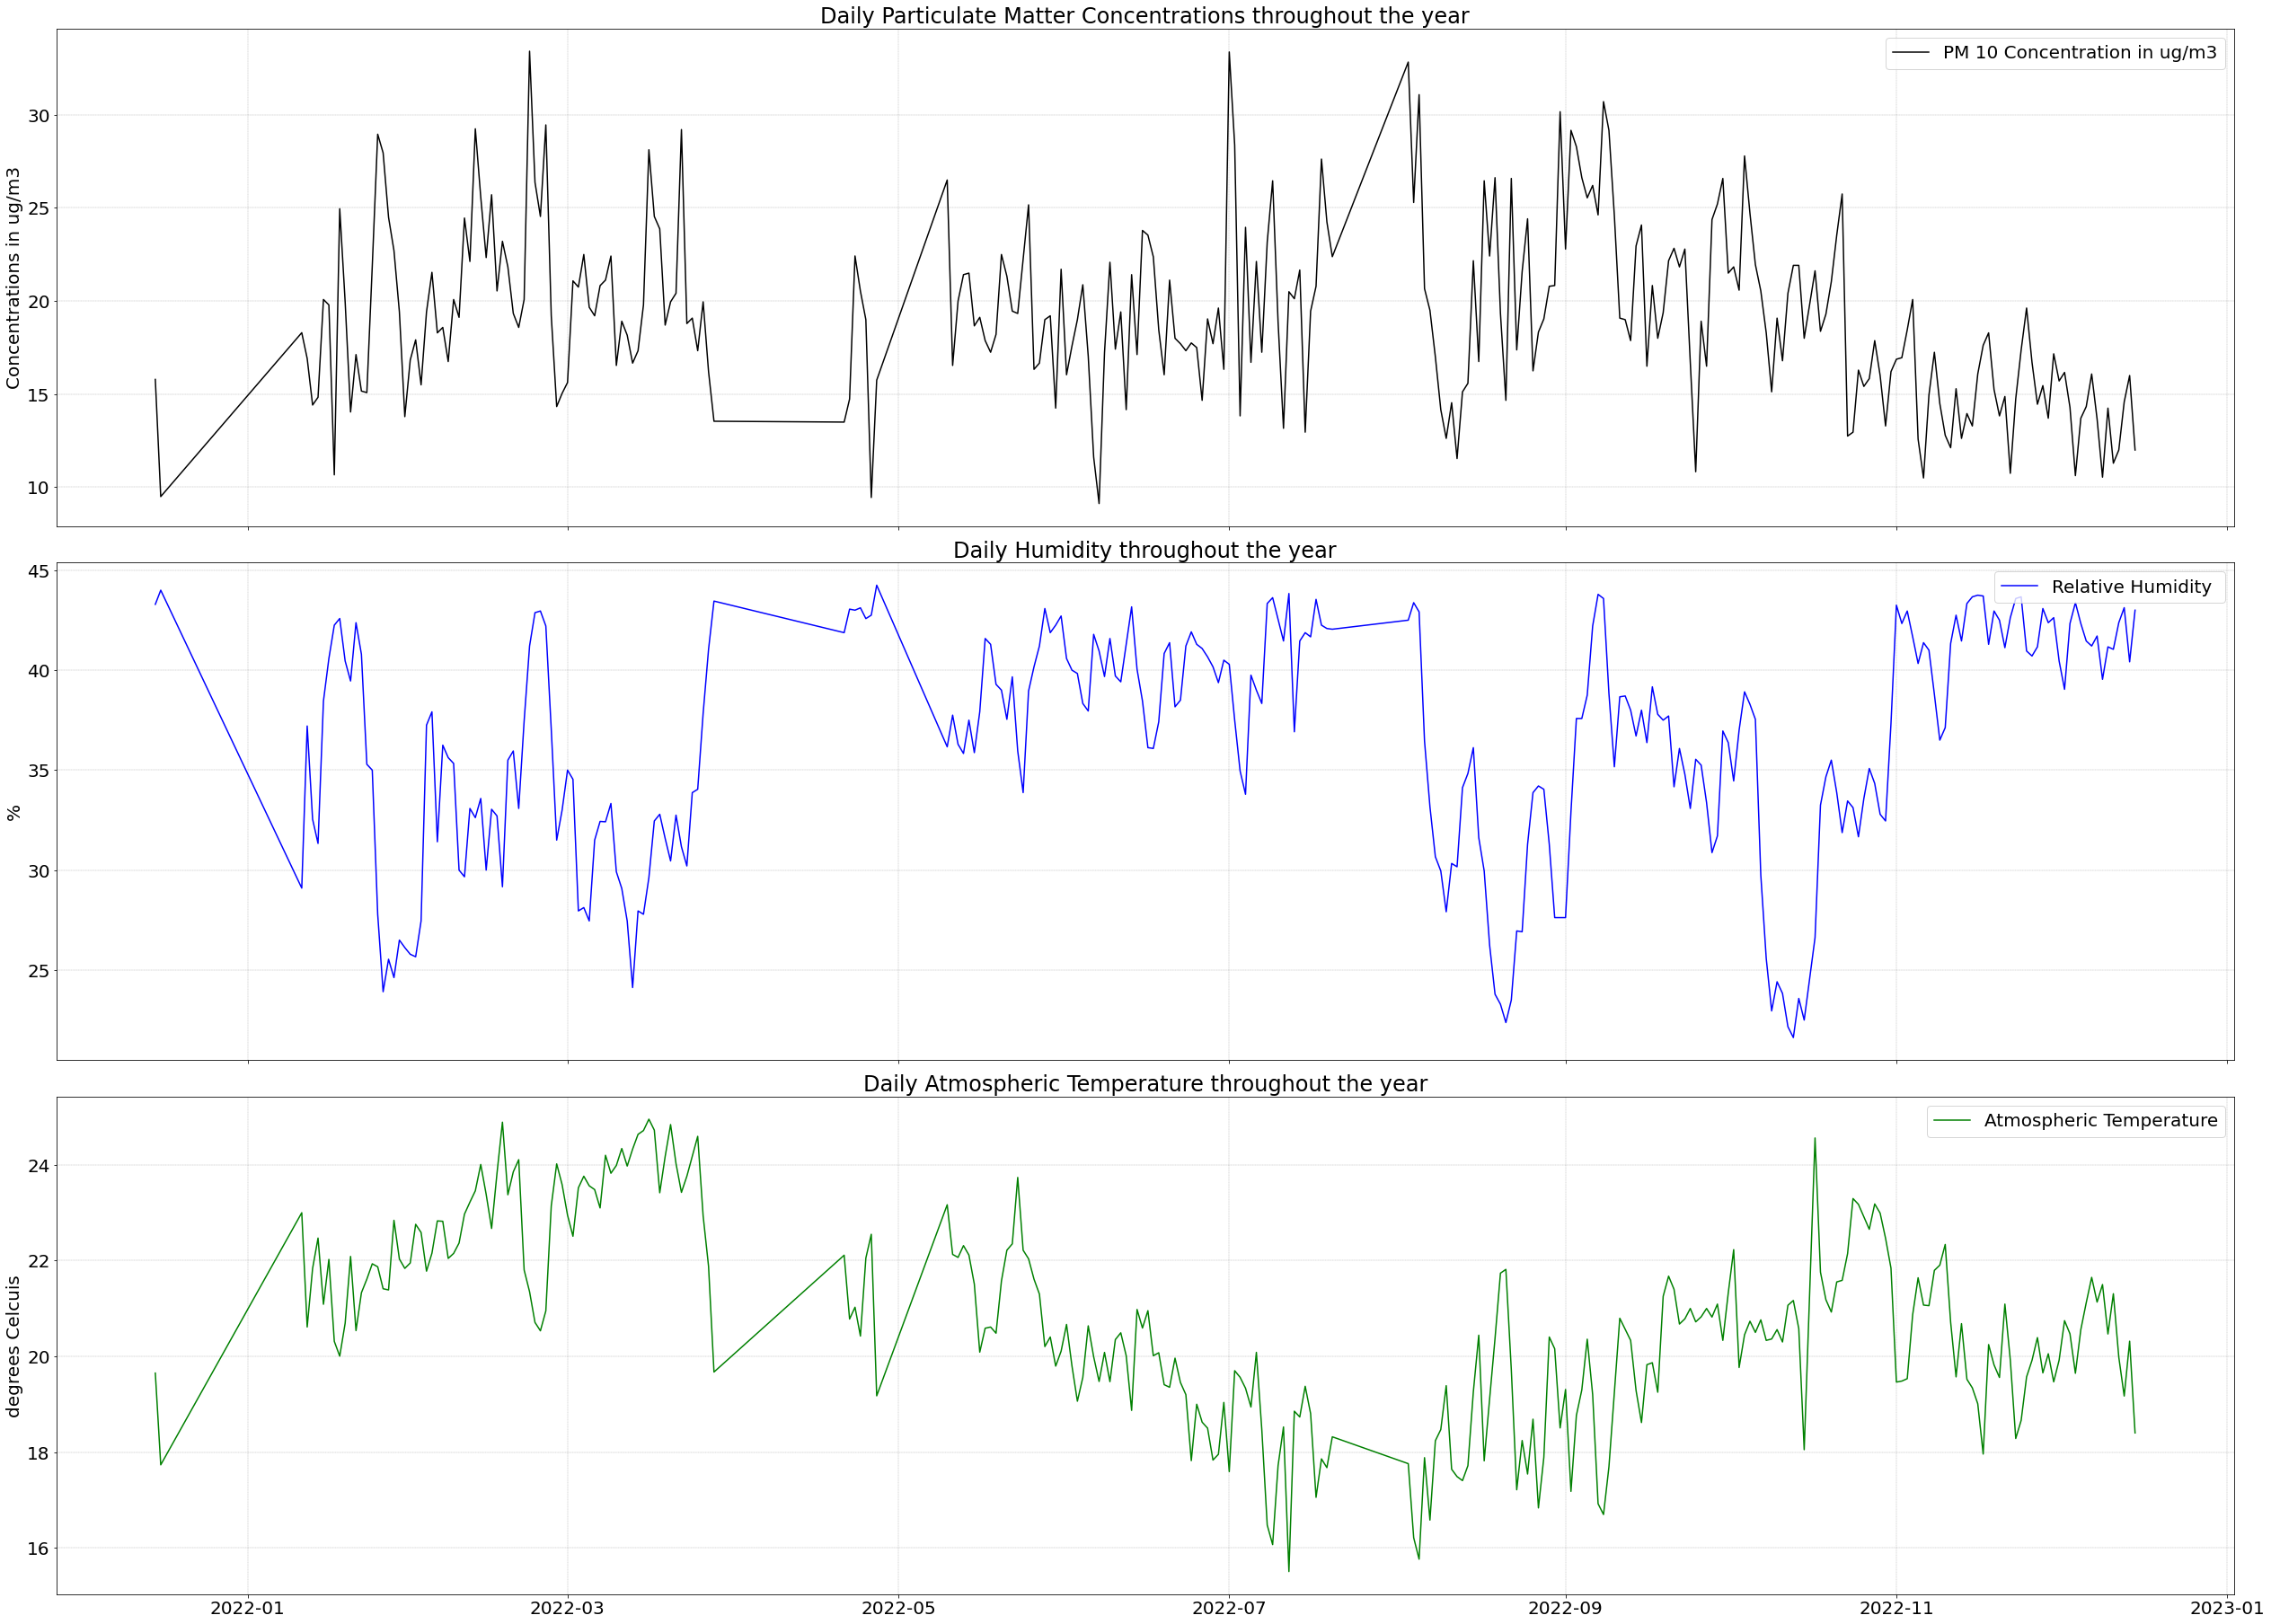

In [31]:
# Plotting hourly variations for the entire monitoring period
fig, (ax0,ax1,ax2) = plt.subplots(3, 1, sharex=True, constrained_layout=True,figsize=(35,25))
    #PM2.5
all_data_time=all_data_clean.set_index('Time').dropna()
all_data_time
Data_plot=all_data_time.resample('D')['Conc(ug/m3)','RH (%)','AT (C)'].mean()
Data_plot
Data_plot.isnull().sum()
Data_plot.dropna(axis=0,inplace=True)
ax0.plot(Data_plot.index.values,
            Data_plot['Conc(ug/m3)'],
            color='black',
            label='PM 10 Concentration in ug/m3') 
ax0.set(ylabel= f"Concentrations in ug/m3",
            title=f"Daily Particulate Matter Concentrations throughout the year")
ax0.legend(loc="upper right")
ax0.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
# Plot of Relative Humidity Variation throughout the year
ax1.plot(Data_plot.index.values,
            Data_plot['RH (%)'],
            color='blue',
            label='Relative Humidity ') 
ax1.set(ylabel= f"%",
            title=f"Daily Humidity throughout the year")
ax1.legend(loc="upper right")
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.3)  
# Plot of Temperature Variation throughout the year
ax2.plot(Data_plot.index.values,
            Data_plot['AT (C)'],
            color='green',
            label='Atmospheric Temperature') 
ax2.set(ylabel= f"degrees Celcuis",
            title=f"Daily Atmospheric Temperature throughout the year")
ax2.legend(loc="upper right")
ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.3)  


In [32]:
all_data_time.resample('60min')['Conc (mg/m3)','RH (%)','AT (C)'].mean()

,Conc (mg/m3),RH (%),AT (C)
Time,,,
2021-12-15 00:00:00,0.011,43.0,18.3
2021-12-15 01:00:00,0.009,44.0,18.1
2021-12-15 02:00:00,0.018,44.0,18.1
2021-12-15 03:00:00,0.015,44.0,18.2
2021-12-15 04:00:00,0.011,44.0,17.9
...,...,...,...
2022-12-14 20:00:00,0.024,35.0,20.8
2022-12-14 21:00:00,0.015,39.0,19.5
2022-12-14 22:00:00,0.019,40.0,18.7


## Duirnal Patterns


In [33]:
# A function for Hourly hour per month
def duirnal_patterns(df): 
#     month_df=df[df['month']==month_digit]
    df1=df.set_index('Time').dropna()
    hourly_avg=df1.groupby('hour')['Conc (mg/m3)'].mean()
    # Plotting hourly average over the entire monitoring period
    # Plotting a graph of hourly averages
    fig,ax=plt.subplots(figsize=(25,9))
    #PM2.5
    ax.plot(hourly_avg.index.values,
            hourly_avg.values,
            color='black',
            label=f'Particulate Concentration in mg/m3')    
    ax.set(xlabel="Hour of the Day",
               ylabel= f"Pollutant Concentrations",
               title=f"Duirnal Patterns in Nairobi for the entire year")
    plt.legend()
    plt.xticks(hourly_avg.index.values)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show() 

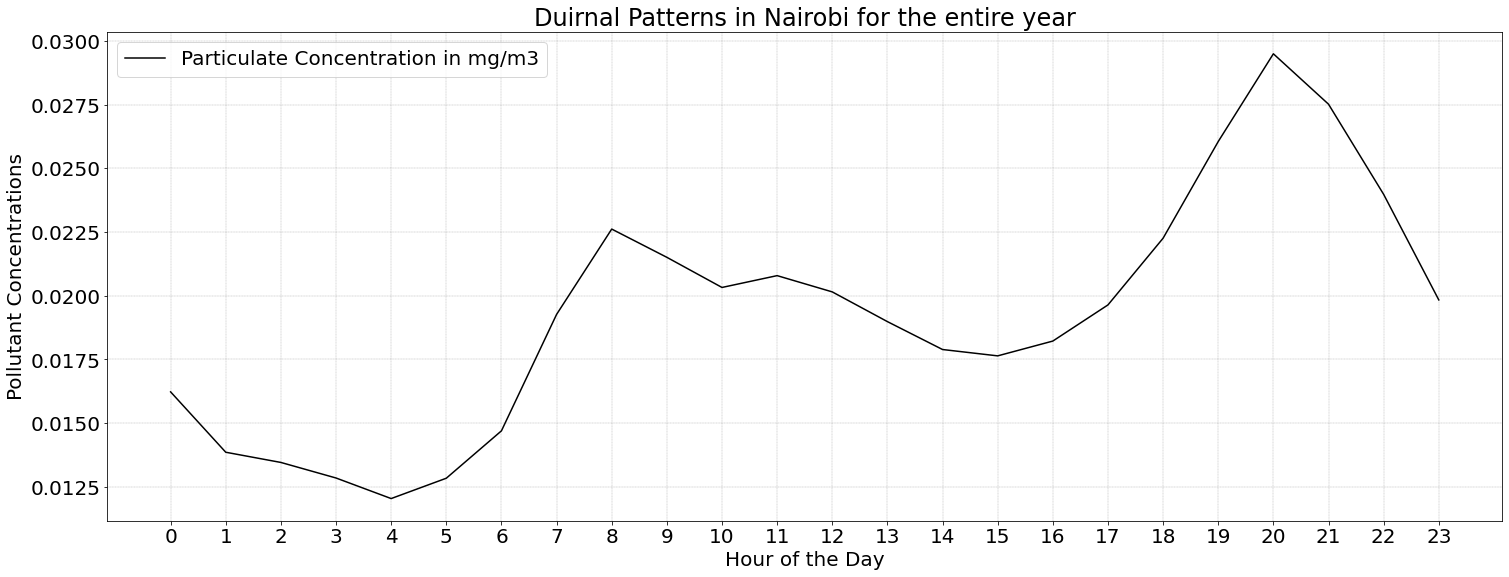

In [34]:
duirnal_patterns(all_data_clean)

In [35]:
# Transfer the Clean data to csv
all_data_clean.to_csv("/Users/Christine.Muthee/Documents/Nairobi_AQ/All_Nairobi_data.csv")

## GEOS-CF Comparison 

# START FROM HERE !!!!!!!!!!!!

In [39]:
# importing the necessary libraries to convert netcdf to csv
import xarray as xr
import os
import nctoolkit as nc 
import glob
import math 

In [42]:
Geos_data="/Users/Christine.Muthee/Documents/Nairobi_AQ/Nairobi GEOS_CF_data/"
os.listdir(Geos_data)

['aqc_tavg_1hr_g1440x721_v1-202302231138output.25565.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231208output.5633.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231031output.31816.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231204output.3599.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231151output.31542.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231134output.23716.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231131output.23437.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231331output.7731.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231035output.32052.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231125output.19801.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231037output.1540.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231033output.32002.webform.nc',
 'aqc_tavg_1hr_g1440x721_v1-202302231128output.21562.webform.nc']

In [43]:
# Set a loop to create a .csv file for each .nc file listed in `files_to_convert`
csv_dir="/Users/Christine.Muthee/Documents/Nairobi_AQ/Nairobi_Geos_csv/"
for filename in os.listdir(Geos_data):
    ds = xr.open_dataset(Geos_data+filename)
    # ds = data.to_xarray(cdo_times = True)
    df = ds.to_dataframe()
    df.to_csv(csv_dir + filename[:-3] + '.csv')
    print(filename + ' has been processed to .csv')

aqc_tavg_1hr_g1440x721_v1-202302231138output.25565.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231208output.5633.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231031output.31816.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231204output.3599.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231151output.31542.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231134output.23716.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231131output.23437.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231331output.7731.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231035output.32052.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231125output.19801.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1-202302231037output.1540.webform.nc has been processed to .csv
aqc_tavg_1hr_g1440x721_v1

In [44]:
csv_files = glob.glob(csv_dir + "/*.csv")
csv_files
geos_outputs_csv=(pd.read_csv(files)for files in csv_files)
all_geos_outputs_csv=pd.concat(geos_outputs_csv,axis=0,ignore_index=True)
all_geos_outputs_csv["time"]=pd.to_datetime(all_geos_outputs_csv["time"])
all_geos_outputs_csv

,time,longitude,latitude,pm25_rh35_gcc
0,2022-06-01 00:30:00,36.50,-1.50,8.892696
1,2022-06-01 00:30:00,36.50,-1.25,40.564570
2,2022-06-01 00:30:00,36.50,-1.00,39.689570
3,2022-06-01 00:30:00,36.75,-1.50,7.595822
4,2022-06-01 00:30:00,36.75,-1.25,40.439570
...,...,...,...,...
110011,2022-12-31 23:30:00,37.00,-1.25,7.255910
110012,2022-12-31 23:30:00,37.00,-1.00,6.396535
110013,2022-12-31 23:30:00,37.25,-1.50,6.865285
110014,2022-12-31 23:30:00,37.25,-1.25,5.841847


In [45]:
# Daily average 
all_geos_outputs_df=all_geos_outputs_csv.set_index("time")["pm25_rh35_gcc"].resample('D').mean()
all_geos_outputs_df

time
2021-12-15    8.952584
2021-12-16    7.725478
2021-12-17    9.882760
2021-12-18    8.538131
2021-12-19    7.097610
                ...   
2022-12-27    8.481609
2022-12-28    8.160757
2022-12-29    7.410100
2022-12-30    8.189813
2022-12-31    7.946325
Freq: D, Name: pm25_rh35_gcc, Length: 382, dtype: float64

In [ ]:
da

In [49]:

Nairobi_RGM= all_data_time["Conc(ug/m3)"].resample('D').mean()
Nairobi_RGM

Time
2021-12-15    15.791667
2021-12-16     9.500000
2021-12-17          NaN
2021-12-18          NaN
2021-12-19          NaN
                ...    
2022-12-11    11.291667
2022-12-12    12.000000
2022-12-13    14.583333
2022-12-14    16.000000
2022-12-15    12.000000
Freq: D, Name: Conc(ug/m3), Length: 366, dtype: float64

In [ ]:
Nairobi_clean.head()

Nairobi_clean['Conc (ug/m3)']=Nairobi_clean["Conc (mg/m3)"]*1000
Nairobi_clean


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Time,Conc (mg/m3),Qtot (m3),WS (MPS),RH (%),AT (C),hour,day,day_of_week,month,day_of_year,weekday_weekend,Conc (ug/m3)
0,2021-12-14 16:00:00,0.018,0.700,10.1,42,23.3,16,14,1,12,348,1,18.0
1,2021-12-14 17:00:00,0.017,0.700,10.0,44,22.8,17,14,1,12,348,1,17.0
2,2021-12-14 18:00:00,0.020,0.701,9.9,43,21.5,18,14,1,12,348,1,20.0
3,2021-12-14 19:00:00,0.024,0.701,9.8,43,20.1,19,14,1,12,348,1,24.0
4,2021-12-14 20:00:00,0.026,0.700,9.8,43,19.8,20,14,1,12,348,1,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2022-09-02 09:00:00,0.027,0.700,7.9,32,15.8,9,2,4,9,245,1,27.0
6281,2022-09-02 10:00:00,0.039,0.700,8.0,32,16.4,10,2,4,9,245,1,39.0
6282,2022-09-02 11:00:00,0.047,0.700,8.1,33,17.0,11,2,4,9,245,1,47.0
6283,2022-09-02 12:00:00,0.049,0.700,8.2,32,18.7,12,2,4,9,245,1,49.0


In [ ]:
Nairobi_RGM=Nairobi_clean.set_index("Time")["Conc (ug/m3)"].resample('D').mean()
Nairobi_RGM

Time
2021-12-14    19.375000
2021-12-15    15.791667
2021-12-16     9.500000
2021-12-17          NaN
2021-12-18          NaN
                ...    
2022-08-29    20.791667
2022-08-30    20.833333
2022-08-31    30.166667
2022-09-01    22.791667
2022-09-02    27.214286
Freq: D, Name: Conc (ug/m3), Length: 263, dtype: float64

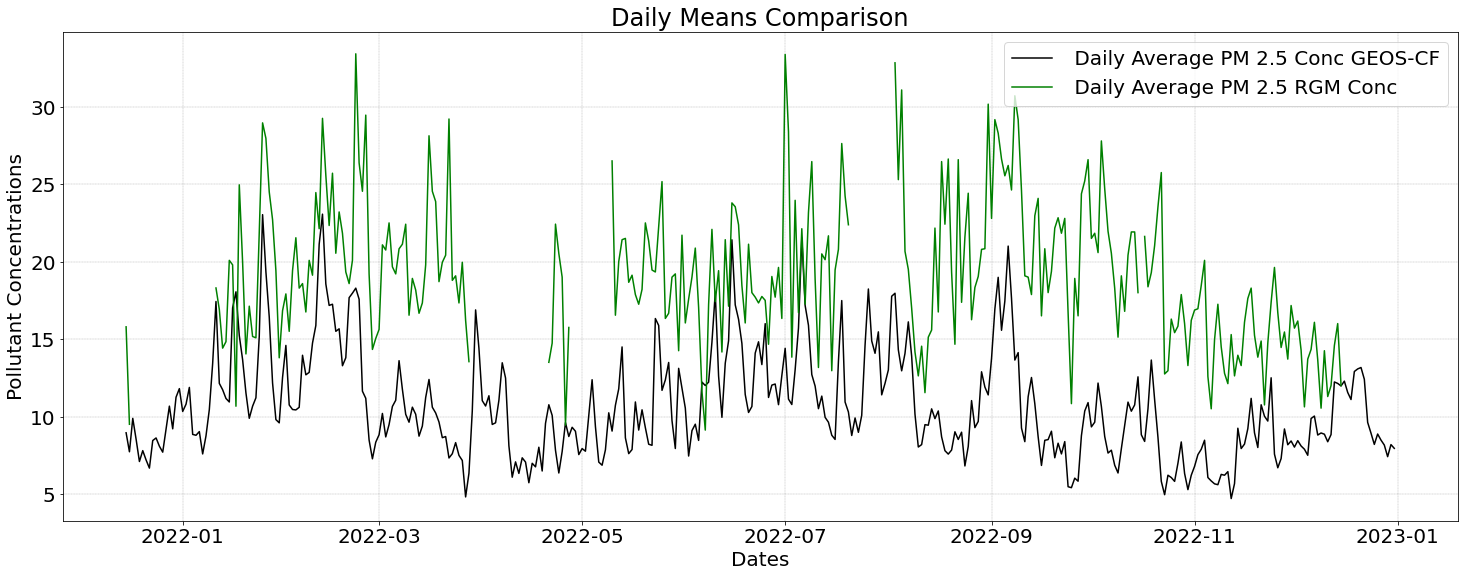

In [51]:
fig,ax=plt.subplots(figsize=(25,9))
#PM2.5
ax.plot(all_geos_outputs_df.index,
        all_geos_outputs_df.values,
        color='black',
        label=f' Daily Average PM 2.5 Conc GEOS-CF')   
# # PM10
ax.plot(Nairobi_RGM.index,
        Nairobi_RGM.values,
        color='green',
        label=f' Daily Average PM 2.5 RGM Conc')   
ax.set(xlabel="Dates",
            ylabel= f"Pollutant Concentrations",
            title=f"Daily Means Comparison")
plt.legend()
# plt.xticks(daily_mean_LCS.index)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show() 